In [1]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing Dataset : Please add dataset to your input area and then load using following command

In [4]:
df = pd.read_csv("/kaggle/input/mall-customers/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
datasubset = df.loc[:, ["Age", "Annual Income (k$)"]]

Text(0.5, 1.0, 'Customer Segmentation on Age and Annual Income')

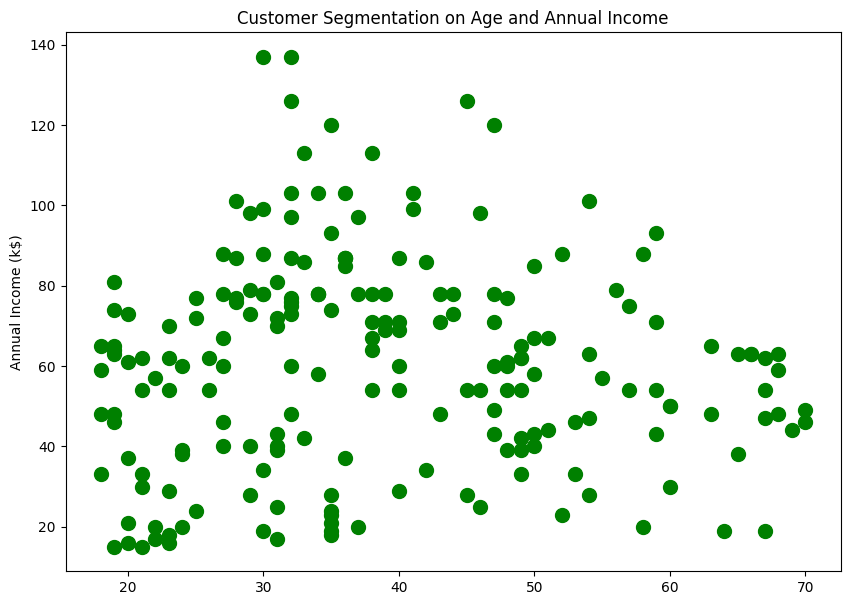

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(datasubset[["Age"]], datasubset[["Annual Income (k$)"]], s=100, c='green')
#plt.xlabel("Age of Customers")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation on Age and Annual Income")

From the above plot, we can conclude that there is no visually clear clustering could be done. Anyway let us try some hierarchical model

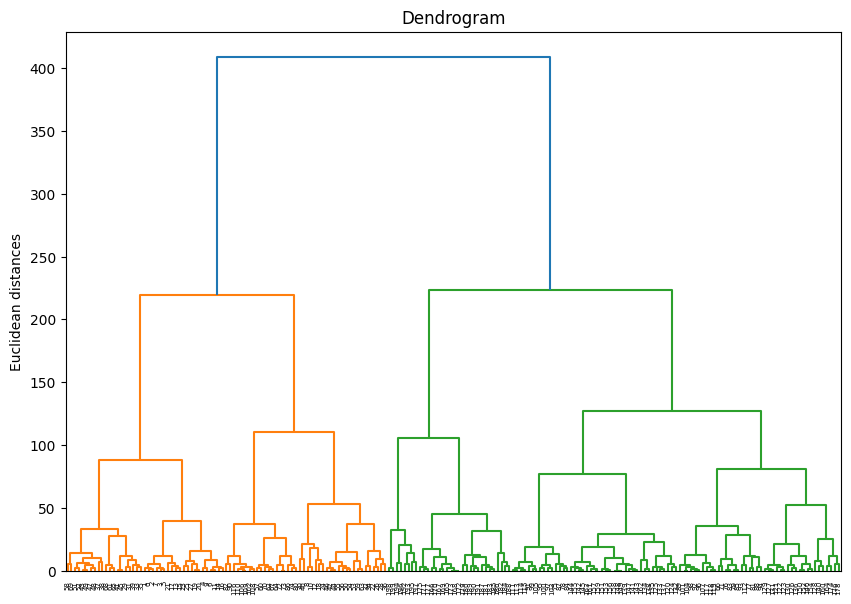

In [72]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 7))

dendrogram = sch.dendrogram(sch.linkage(datasubset, method = "ward"))
plt.title('Dendrogram')
#plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

We have to find the most lengthiest line vertically without any horizontal lines. Here only two vertical lines are available, so lets do Agglomerative clustering

In [73]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [74]:
cl = cluster.fit_predict(datasubset)

In [28]:
from sklearn.metrics import silhouette_score
silhouette_score(datasubset, cl)

0.4104652474372429

Here the score is very poor, so the model is not performing a good. Lets see how Dbscan or K-Means performs

In [75]:
X = datasubset.values

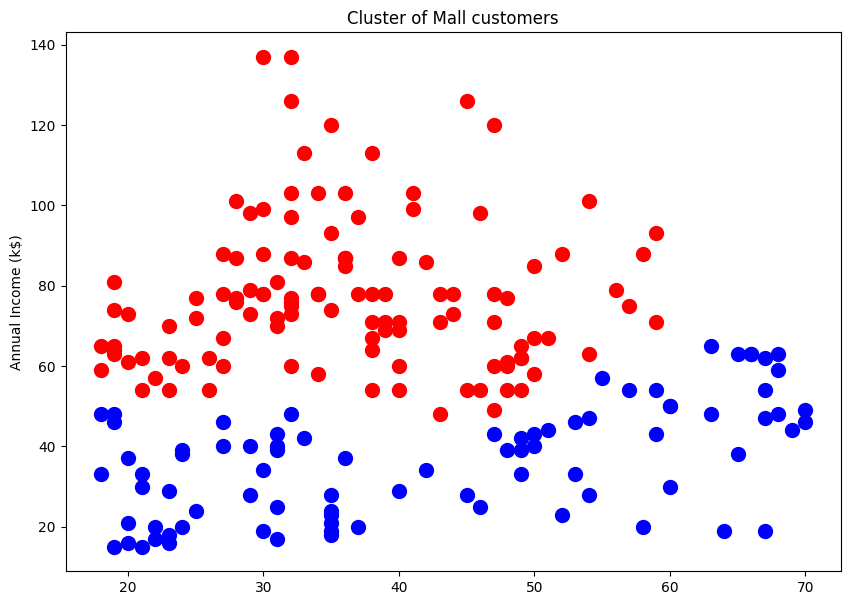

In [77]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label='Cluster 2')
plt.title('Cluster of Mall customers')
#plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

Lets try DBSCAN

In [33]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

In [78]:
distances = np.sort(distances, axis=0)
distances = distances[:,]
plt.plot(distances)

AxisError: axis 0 is out of bounds for array of dimension 0

TypeError: 'str' object is not callable

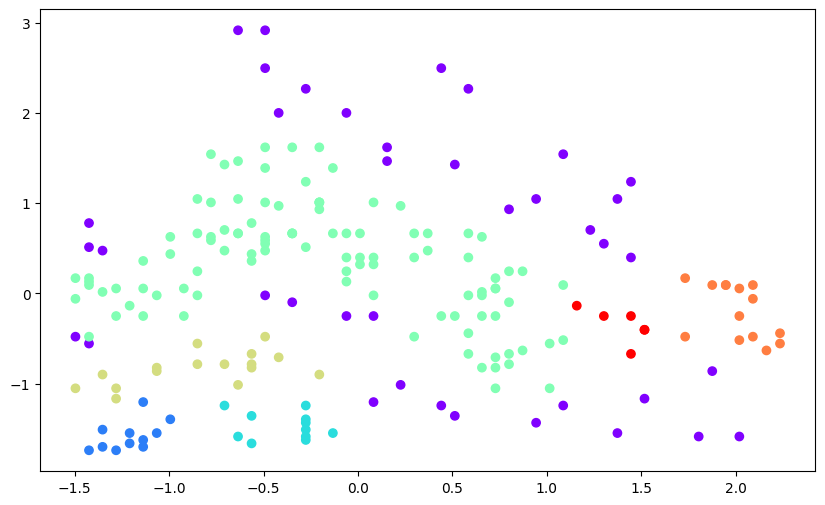

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply DBSCAN algorithm
# Choose appropriate epsilon (eps) and minimum samples (min_samples)
dbscan = DBSCAN(eps=0.3, min_samples=5)
datasubset['Cluster'] = dbscan.fit_predict(X_scaled)

# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))

# DBSCAN assigns the cluster label '-1' to outliers, so we handle those separately
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=datasubset['Cluster'], cmap='rainbow', label='Clustered Points')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.title('Customer Segments using DBSCAN')
plt.colorbar()
plt.show()

# Optional: Check the number of points in each cluster
print(mall_data['Cluster'].value_counts())


In [60]:
dbscancluster = DBSCAN(eps=7, min_samples=5)
dbscancluster.fit(X)
clusters = dbscancluster.labels_

In [61]:
len(set(clusters))

3

In [62]:
silhouette_score(X,clusters)

0.28705019416571775

The model performance is not better than the first model. Hence lets go for K-Means

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

TypeError: 'str' object is not callable

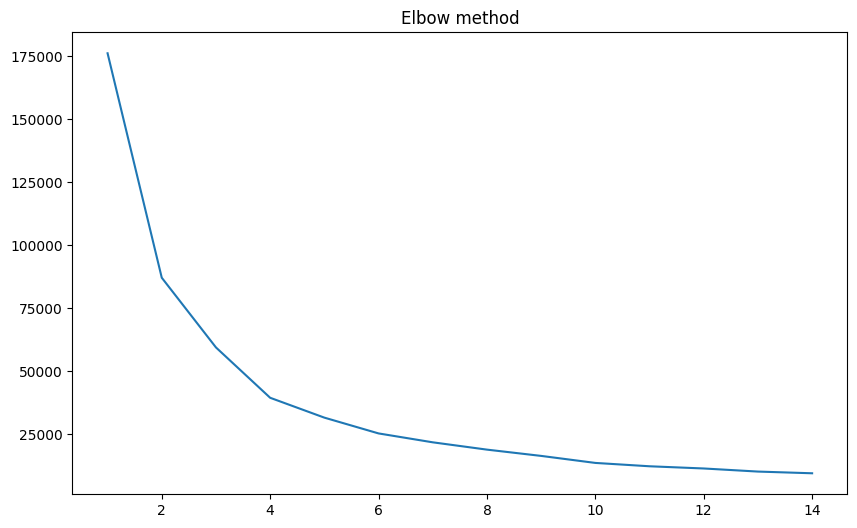

In [63]:
from sklearn.cluster import KMeans
individual_clustering_score = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    individual_clustering_score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), individual_clustering_score)
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel('Clustering Score')
plt.show()

In [64]:
Kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(X)
pred = kmeans.predict(X)
pred

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 3,  3,  3,  3,  3,  3,  3,  3, 10,  3, 10,  3, 10,  3,  3,  3,  3,
        3, 10,  3,  3,  3, 10,  3, 10,  3, 10,  3,  0,  3, 10,  3, 10,  2,
        0,  2,  0,  2,  2,  2,  4,  2,  0,  2,  0,  2,  0,  2,  2,  2,  0,
        2,  2,  4,  0,  0,  0,  4,  2,  0,  4,  2,  4,  0,  4, 13,  0,  4,
       13,  2,  4,  0,  4,  4,  4, 13,  9,  9, 13,  9,  4,  9,  4,  9, 13,
        9,  9, 13, 13,  9,  5, 13,  9,  9, 13, 13,  9, 13,  9, 13, 13,  9,
        5, 13,  9, 13,  5,  9,  5,  5,  5, 13, 12, 13, 13, 13,  5,  9,  9,
        9,  1, 12, 12, 12,  1,  1, 12, 12,  5, 12, 12, 12,  1,  1,  1,  1,
       12,  1,  1,  1,  5,  1,  1,  1,  1,  1,  7,  1,  1,  1,  7,  7,  7,
        7,  7,  1,  7,  1,  1,  1,  8,  1,  1,  1,  8,  7,  7,  6,  6,  6,
        7,  6,  6,  6,  8,  6,  8,  6,  8,  6,  6,  6,  8,  6,  6,  6,  8,
        6,  6,  6,  6,  6, 11, 11, 11, 11, 11, 11, 11, 11], dtype=int32)

In [65]:
silhouette_score(X, pred)

0.408464915988848

All above 3 models are giving a poor Silhouette score, so poor model.

This is because we have considered Age and Annual Income together, which is incorrect, hence we are normlizing the data 

In [67]:
from sklearn.preprocessing import normalize
scaled = normalize(X)
scaled = pd.DataFrame(scaled)
scaled.head()

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


In [70]:
Kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(scaled)
pred = kmeans.predict(scaled)
pred

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 4,  5,  4,  5,  0,  4,  0,  4,  6,  5,  6,  0,  6,  4,  0, 13,  0,
       13,  0,  5,  5, 13,  0,  4,  0, 13,  5,  4,  5,  1,  0,  2,  5,  8,
        5,  7,  4,  3, 13,  8,  0,  7,  4,  1,  4,  7,  4,  2,  2,  1,  4,
        1,  2,  5,  4, 13,  4,  5,  7,  4,  5, 12,  5,  4,  4,  9,  3,  5,
        9,  2,  5, 13,  4,  4, 13,  8,  3,  1, 12,  3, 13,  2,  4,  3,  9,
        3, 13,  9,  7,  3,  4, 10,  1,  2,  8,  9,  1, 12,  1, 10,  9,  1,
       13, 12,  1, 10, 13,  3, 13, 13, 13, 10,  7, 11, 11, 11, 13,  1,  1,
        1,  9,  7,  7,  7, 10, 12,  7,  7,  3,  8,  2,  8, 10, 12, 11,  9,
        7, 12, 11,  8,  1, 12,  9, 12, 10,  9,  7, 12, 12, 12,  8,  8,  7,
        8,  7, 10,  8,  9, 12,  9,  2,  9, 11,  9,  7, 12,  8,  9, 12,  9,
       12, 10, 12, 12,  7, 10,  2, 10,  7,  9,  9, 10,  8, 11, 12, 10,  8,
       11,  9, 10, 10, 10, 11, 10,  9, 11,  9, 11, 11, 11], dtype=int32)

In [71]:
silhouette_score(scaled,pred)

0.5545590942396406

Here the model performance is little better than previous models. Thanks to normalization.

To improve the model : more data or variables can help